# Capstone 1: Analytic Report and Resarch Proposal

In this report, I will explore digital political advertising data in the United States from Google's __[advertising transparency report.](https://transparencyreport.google.com/political-ads/region/US?hl=en.)__ In 2018, Google, Facebook, and Twitter began making data of the political ads used on their platforms available to the public after the controversy over misinformation being spread through social media during the 2016 presidential election. I am a political scientist and former academic who is interested in the intersection of media and politics and how it impacts digial civic and political engagement. My goal for this capstone is to not only learn more about the campaigns and other organizations that are using digital advertising in the U.S., but to also learn more about how organizations vary with respect to the resources they allocate to the platform, and to learn more about the content they are placing in their advertising. 

Google provides data beginning in 2018, but I will only use data from 2019 for the following reasons. From research and news coverage, we know a lot about advertising in presidential and congressional election years (like 2016 and 2018, respectively), but we do not know a lot about advertising in the time between them. Furthermore, we know even less about how campaigns and other political organizations use digital advertising. Finally, national election cycles in recent years have been beginning almost immediately after the previous election and it is likely that the 2020 national campaigns are already active online (which should lead to us to discover some interesting patterns worth investigating further). 

## Major Questions

1. What political organizations are using digital advertising in 2019? Are they primarily presidential campaigns or are they a mix of campaigns and interest groups?
2. Is there a lot of variation between organizations in how much they are spending on digital ads and the number of people exposed to them?
3. Which types of ads are organizations airing the most (text, video, or images)?

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [121]:
# Reading in the ads data

df = pd.read_csv("/Users/machilders/Box Sync/Data Science/Thinkful/Data Files/google-political-ads-transparency-bundle/google_political_ads_creative_stats.csv", engine = 'python')

### Dataset Description


#### Background

I chose Google's data because it is more accessible than Facebook's and Twitter's and they provide all of it in one place. Google's data cover ads run on Google Ads, YouTube, and Google's partner sites (though the company is not clear about which partner sites). When you download it, it is provided in six large CSVs. I am using the "Google Political Ads Creative Stats" file, which features every single ad that was run on their platforms since the beginning of 2018 through August 4, 2019. The file also provides contextual data about each ad and its sponsoring organization. Before I describe these data in greater detail, I will remove 2018 data from the file. 

In [122]:
#Drop ads not in the U.S.
df.drop(df.loc[df['regions'] != "US"].index, inplace = True)

In [123]:

# date_range_start is a string variable, so I am converting it to a date/time variable here via creating a 
# new variable and new column.
df['date_start'] = pd.to_datetime(df['date_range_start'], format = '%m/%d/%y')

#I want to look at 2019 only, so I'm creating a dummy variable equaling 1 if ads started in 2019, 0 if not
#Creating a variable equaling January 1, 2019
df['y19'] = pd.to_datetime('1/1/2019')

df['y2019'] = np.where(df['date_start'] >= df['y19'], 1, 0)

#Keeping only the rows/ads that started on January 1, 2019 and later

df.drop(df.loc[df['y2019'] == 0].index, inplace = True)

#I am resetting the index to ensure that it reflects the number of ads in the dataframe

df.reset_index()

index                 ad_id  \
0           1  CR106723546394263552   
1           2  CR110074857835724800   
2           3  CR111253534300700672   
3           4   CR14821966498234368   
4           5  CR153237286295699456   
5           6  CR170363279409938432   
6           7  CR183144002571206656   
7           8  CR184437028245471232   
8           9  CR200287862749396992   
9          10  CR213325871631564800   
10         11  CR229374343350583296   
11         12  CR240963195907342336   
12         13  CR250865122749186048   
13         14  CR267137894840270848   
14         15  CR284474994187042816   
15         16  CR293622930930139136   
16         17  CR295010789482299392   
17         18  CR305304142463631360   
18         19  CR305471268231053312   
19         20  CR306034218184474624   
20         21  CR318419117159743488   
21         22  CR324725915856666624   
22         23   CR32836365007716352   
23         24  CR333311177524248576   
24         25  CR340769989529174016   
25         26  CR341614414459305984   
26         27  CR346988827295875072   
27         28  CR355573814085550080   
28         29  CR357210162265587712   
29         30  CR373139611850899456   
...       ...                   ...   
61013  211782   CR75557889304952832   
61014  211783   CR75977078113042432   
61015  211784   CR78707715240624128   
61016  211785   CR83811098460946432   
61017  211786   CR85324026460766208   
61018  211787   CR88559339425497088   
61019  211788   CR93555520262111232   
61020  211789   CR96477472412925952   
61021  211790   CR97884847296479232   
61022  211791   CR17383003957231616   
61023  211792  CR202312063656132608   
61024  211793  CR202593538632843264   
61025  211794  CR213852537701269504   
61026  211795   CR24243956514553856   
61027  211796     CR318583494148096   
61028  211797  CR338630065023614976   
61029  211798  CR358896263346782208   
61030  211799  CR388191101401432064   
61031  211800  CR459861667346382848   
61032  211801  CR468129994787258368   
61033  211802  CR482063006134435840   
61034  211803   CR48450804511670272   
61035  211804  CR487833243157004288   
61036  211805   CR48908201348825088   
61037  211806  CR552197004579569664   
61038  211807  CR560735262125064192   
61039  211808    CR5666608051650560   
61040  211809   CR78568627019710464   
61041  211814  CR511023042898427904   
61042  211816  CR561899644938878976   

                                                  ad_url ad_type regions  \
0      https://transparencyreport.google.com/politica...    Text      US   
1      https://transparencyreport.google.com/politica...    Text      US   
2      https://transparencyreport.google.com/politica...   Video      US   
3      https://transparencyreport.google.com/politica...    Text      US   
4      https://transparencyreport.google.com/politica...   Video      US   
5      https://transparencyreport.google.com/politica...    Text      US   
6      https://transparencyreport.google.com/politica...   Image      US   
7      https://transparencyreport.google.com/politica...   Image      US   
8      https://transparencyreport.google.com/politica...    Text      US   
9      https://transparencyreport.google.com/politica...   Video      US   
10     https://transparencyreport.google.com/politica...    Text      US   
11     https://transparencyreport.google.com/politica...   Image      US   
12     https://transparencyreport.google.com/politica...   Image      US   
13     https://transparencyreport.google.com/politica...    Text      US   
14     https://transparencyreport.google.com/politica...    Text      US   
15     https://transparencyreport.google.com/politica...   Image      US   
16     https://transparencyreport.google.com/politica...    Text      US   
17     https://transparencyreport.google.com/politica...    Text      US   
18     https://transparencyreport.google.com/politica...    Text      US   
19     https://transparencyreport.google.com/politica...   Image     

The columns include identifiers for each ad (ad_id), identifiers for the organization purchasing the ad (advertiser_id), an object column for the organization's name (advertiser_name), and the region (in this case, the United States). Google also identifies the sponsoring organization's campaigns that included the ad (ad_campaigns_list). There are also colums indicating the date in which the ad began its run (date_range_start) and when it ended (date_range_end). There is also a variable measuring how many times an ad was viewed (impressions) and whether the ad was video, textual, or an image (ad_type). Finally, the "spend_range_min" and "spend_range_max" columns provide indirect measures over how much each advertiser paid for the ad. Unfortunately, the company does not explain why it chose not to disclose exact amount. To avoid biased inferences in my spending analysis, I will use the midpoint of the min and max spending columns to measure spending. 

The spending range colunmns are provided in U.S. dollars as well as in eleven other currencies (Euros, British pounds, and so on.) But, I will use U.S. dollars for this analysis.

The cell below displays a table of summary statistics for every numeric variable in the dataset, including: the number of days that an ad was used and a pair of variables showing a range of how much the sponsoring organization paid for each ad (spend_range_min and spend_range_max). The spending range variables are in U.S. dollars as well as in eleven other currencies. V1 is the index column.

We can see that there are 61,043 rows, indicating that there are 61,043 advertisements in the file for 2019 thus far. 

The cell below lists all of the variables in the dataframe. There are a number of contextual columns providing contextual data for each ad that are string variables. The spending variables and the dummy variables that I created to filter out 2018 data are numeric. 

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61043 entries, 1 to 211816
Data columns (total 39 columns):
ad_id                  61043 non-null object
ad_url                 61043 non-null object
ad_type                61043 non-null object
regions                61043 non-null object
advertiser_id          61043 non-null object
advertiser_name        61043 non-null object
ad_campaigns_list      61043 non-null object
date_range_start       61043 non-null object
date_range_end         61043 non-null object
num_of_days            61043 non-null int64
impressions            61043 non-null object
spend_usd              61043 non-null object
spend_range_min_usd    61043 non-null int64
spend_range_max_usd    61026 non-null float64
spend_range_min_eur    61043 non-null int64
spend_range_max_eur    61011 non-null float64
spend_range_min_inr    61043 non-null int64
spend_range_max_inr    60052 non-null float64
spend_range_min_bgn    61043 non-null int64
spend_range_max_bgn    60768 non-null

In [125]:
# Creating a variable measuring the midpoint of the spending range per ad. 

df['spend_midpoint_usd'] = (df['spend_range_min_usd'] + df['spend_range_max_usd']) / 2



In [126]:
#Making sure that the midpoint spending variable looks like it should after the operations above. 

df.head()

ad_id                                             ad_url  \
1  CR106723546394263552  https://transparencyreport.google.com/politica...   
2  CR110074857835724800  https://transparencyreport.google.com/politica...   
3  CR111253534300700672  https://transparencyreport.google.com/politica...   
4   CR14821966498234368  https://transparencyreport.google.com/politica...   
5  CR153237286295699456  https://transparencyreport.google.com/politica...   

  ad_type regions         advertiser_id             advertiser_name  \
1    Text      US  AR100838960162406400  SECURING LOUISIANAS FUTURE   
2    Text      US  AR100838960162406400  SECURING LOUISIANAS FUTURE   
3   Video      US  AR100838960162406400  SECURING LOUISIANAS FUTURE   
4    Text      US  AR100838960162406400  SECURING LOUISIANAS FUTURE   
5   Video      US  AR100838960162406400  SECURING LOUISIANAS FUTURE   

      ad_campaigns_list date_range_start date_range_end  num_of_days  ...  \
1   CA26221703055015936           2/3/19        2/28/19           26  ...   
2  CA208503138754232320          1/14/19        1/23/19           10  ...   
3  CA397795060592148480           1/7/19         1/9/19            3  ...   
4  CA422538470263619584           2/2/19        2/28/19           27  ...   
5  CA227757786379845632           2/1/19         2/1/19            1  ...   

  spend_range_min_ron spend_range_max_ron  spend_range_min_sek  \
1                 750             37500.0                  750   
2                 750             37500.0                  750   
3                  75               750.0                  750   
4                  75               750.0                    0   
5                   0                75.0                    0   

   spend_range_max_sek  spend_range_min_gbp  spend_range_max_gbp  date_start  \
1               7500.0                   50                500.0  2019-02-03   
2               7500.0                   50                500.0  2019-01-14   
3               7500.0                   50                500.0  2019-01-07   
4                750.0                    0                 50.0  2019-02-02   
5                750.0                    0                 50.0  2019-02-01   

         y19  y2019  spend_midpoint_usd  
1 2019-01-01      1               550.0  
2 2019-01-01      1               550.0  
3 2019-01-01      1               550.0  
4 2019-01-01      1                50.0  
5 2019-01-01      1                50.0  

[5 rows x 40 columns]

#### Summary Statistics

Before I address the analytical questions, I will briefly summarize the main variables that I will use for the analysis. Below you can see the table summary statistics for every numeric variable in the dataset. Each column provies the column count, as well as its mean, median, minimum and maximum values, and values at the 25th, and 75th percentiles. 

In [127]:
df.describe()

num_of_days  spend_range_min_usd  spend_range_max_usd  \
count  61043.000000         61043.000000         61026.000000   
mean      15.215799           105.420769          2245.074231   
std       20.215322          2020.997036          9973.770340   
min        1.000000             0.000000           100.000000   
25%        2.000000             0.000000           100.000000   
50%        8.000000             0.000000           100.000000   
75%       20.000000             0.000000           100.000000   
max      187.000000        100000.000000        100000.000000   

       spend_range_min_eur  spend_range_max_eur  spend_range_min_inr  \
count         61043.000000         61011.000000         61043.000000   
mean             96.825189          1955.374441          6064.528283   
std            1653.327534          7285.905126         33905.519863   
min               0.000000            50.000000             0.000000   
25%               0.000000            50.000000             0.000000   
50%               0.000000            50.000000           250.000000   
75%               0.000000            50.000000          2500.000000   
max           60000.000000         60000.000000        250000.000000   

       spend_range_max_inr  spend_range_min_bgn  spend_range_max_bgn  \
count         60052.000000         61043.000000         60768.000000   
mean          33136.448411           217.241535          1529.234548   
std           57428.143488          1856.966021          3847.133000   
min             250.000000             0.000000            25.000000   
25%             250.000000             0.000000            25.000000   
50%             250.000000             0.000000            25.000000   
75%            2500.000000            25.000000           250.000000   
max          250000.000000         25000.000000         25000.000000   

       spend_range_min_hrk  ...  spend_range_min_pln  spend_range_max_pln  \
count         61043.000000  ...         61043.000000         60917.000000   
mean            806.102256  ...           472.486608          5394.710836   
std            8583.375921  ...          5296.452324         15585.315213   
min               0.000000  ...             0.000000           100.000000   
25%               0.000000  ...             0.000000           100.000000   
50%               0.000000  ...             0.000000           100.000000   
75%             100.000000  ...           100.000000          1000.000000   
max          150000.000000  ...        100000.000000        100000.000000   

       spend_range_min_ron  spend_range_max_ron  spend_range_min_sek  \
count         61043.000000         60835.000000         61043.000000   
mean            515.216323          4973.527575          1015.005816   
std            4979.751466         12880.486016         18259.210961   
min               0.000000            75.000000             0.000000   
25%               0.000000            75.000000             0.000000   
50%               0.000000            75.000000             0.000000   
75%              75.000000           750.000000             0.000000   
max           75000.000000         75000.000000        750000.000000   

       spend_range_max_sek  spend_range_min_gbp  spend_range_max_gbp    y2019  \
count         61017.000000         61043.000000         61010.000000  61043.0   
mean          19553.788289            86.143374          1506.376823      1.0   
std           80826.710914          1408.002323          5818.948493      0.0   
min             750.000000             0.000000            50.000000      1.0   
25%             750.000000             0.000000            50.000000      1.0   
50%             750.000000             0.000000            50.000000      1.0   
75%             750.000000             0.000000            50.000000      1.0   
max          750000.000000         50000.000000         50000.000000      1.0   

       spend_midpoint_usd  
count        61026.0000

##### Number of Days that Ad Ran

The average length of time that an ad ran on Google's platforms was approximately 15 days. But, there is wide variation in the data, as the standard deviation is 20 days. Though, that information is not as useful in this context as it might be in others because the distribution is truncated at one. All ads in the dataframe were run for at least one day.

The histogram below displays the distribution of the number of days that ads ran and each bin measures two days. The mean is marked with a solid vertical blue line and the dashed lines mark one standard deviation above and below the mean, respectively. If you look closely, you will see that the two tallest bins are 1-2 days and 3-4 days, meaning that the most frequent ad runs were between 3-4 days and 1-2 days, respectively. Also, most organizations in the data set ran their ads for between 2-10 days.

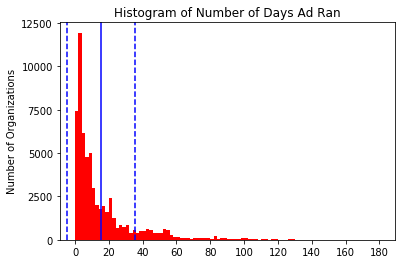

In [128]:
# Plotting a histogram of the number of days that an ad runs. 


plt.hist(df['num_of_days'], range=(0, 180), bins = 90, color = 'red')
plt.xticks(np.arange(0, 200, step = 20))
plt.title("Histogram of Number of Days Ad Ran")
plt.yticks(np.arange(0, 15000, step = 2500))
plt.ylabel('Number of Organizations') #labeling the y-axis
plt.axvline(df['num_of_days'].mean(), color = 'blue', linestyle = 'solid')
plt.axvline(df['num_of_days'].mean() - df['num_of_days'].std(), color = 'blue', linestyle = 'dashed')
plt.axvline(df['num_of_days'].mean() + df['num_of_days'].std(), color = 'blue', linestyle = 'dashed')

plt.show()

##### Money Spent Per Ad

The distribution in spending per ad is positively skewed, as the median ($50) is much less than the mean ($1161.33). There is a high amount of variation in the data, as the standard deviation ($5232) is approximately five times the mean. The 25th, 50th, and 75th percentiles in spending are all equal to $50, which means that most ad purchases are in relatively modest amounts.  

In [129]:
#Using the describe method to see basic summary statistics on our spending variable. 

df.spend_midpoint_usd.describe()

count    61026.000000
mean      1161.333694
std       5232.341221
min         50.000000
25%         50.000000
50%         50.000000
75%         50.000000
max      75000.000000
Name: spend_midpoint_usd, dtype: float64

As suspected, most political organizations that advertise on Google's platforms spend small amounts per ad. In the bar graph below, over 80% of orgnaizations spent $50 per unit, while roughly 10% spent $550. A small proportion, less than 10%, spent over $25,500 per advertisement and since we cannot see the bar at $75,000, very few orgnizations have spent that much. 


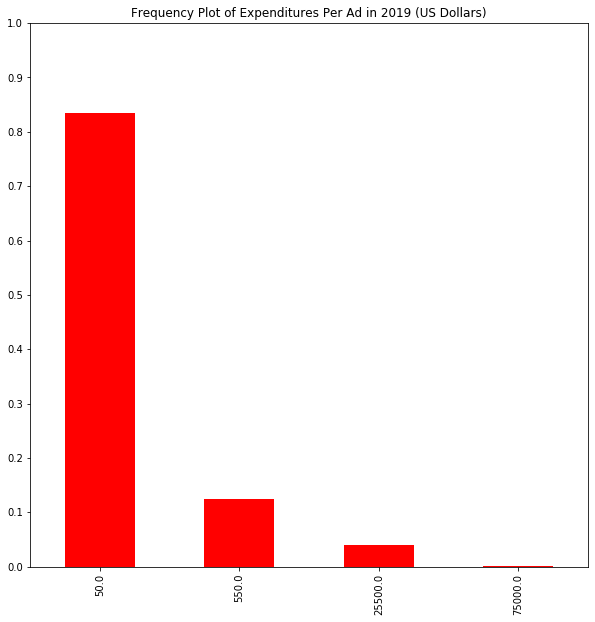

In [130]:
plt.figure(figsize=(10, 10))

df['spend_midpoint_usd'].value_counts(sort = True, normalize = True).plot(kind='bar', color = 'red')
plt.yticks(np.arange(0, 1.1, step=.1))
plt.title("Frequency Plot of Expenditures Per Ad in 2019 (US Dollars)")

plt.show()

##### Ad Impressions 

The impressions variable is a categorical measure with five levels:  "<= 10K", "10K-100K", "100K - 1M", "1M-10M', and ">10M" (k referring to thousands and M referring to millions). The modal category is <= 10K. Unfortunately, the categories measure ranges of impressions instead of precise measures of impressions per ad. 

In [131]:
df.impressions.describe()

count     61043
unique        5
top       < 10K
freq      49977
Name: impressions, dtype: object

The bar graph below shows that the strong majority of ads received received less than or equal to 10,000 impressions (about 80% of all ads). Almost 10,000 ads achieved between 10,000 and 100,000 impressions. Fewer than 5,000 ads had 100,000 to 1,000,000 impressions and noticeably fewer ads gained over 1,000,000 impressions. This suggests that either most political organizations using Google had only modest amounts of resources to allocate to digial advertising or they had sophisticated strategies and targeted small groups of the population.  

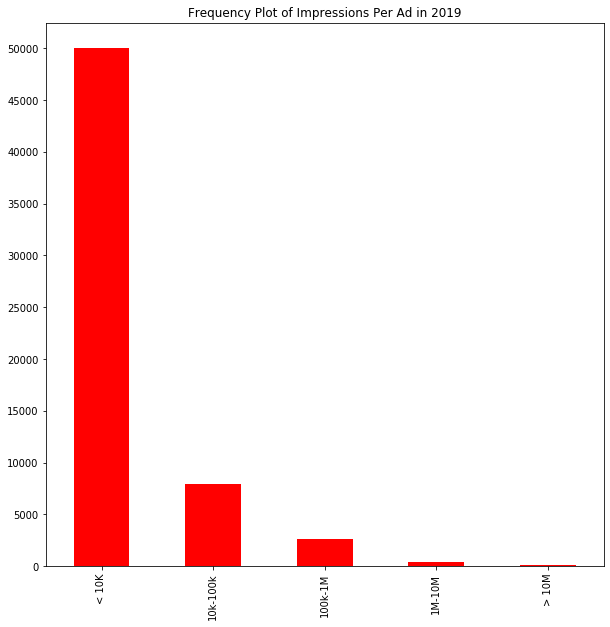

In [132]:
#Making a frequency plot of the impressions variable. 
plt.figure(figsize=(10, 10))

df['impressions'].value_counts(sort = True).plot(kind='bar', color = 'red')
plt.yticks(np.arange(0, 55000, step=5000))
plt.title("Frequency Plot of Impressions Per Ad in 2019")
plt.show()
                            

##### Ad Type

The ad_type variable is a cateogrical measure with three categories: text, image, or video. The modal category is text with 24,777 of the 61,043 total ads. Below I display a frequency plot of the variable. 

In [133]:
#Exploring the ad_type variable

df.ad_type.describe()

count     61043
unique        3
top        Text
freq      24777
Name: ad_type, dtype: object

Organizations preferred to use textual ads over image and video ads. Approximately 40% of all ads were text, a little over 30% were image-based ads, and about 30% were video ads. 

In the remaining sections, I explore the answers to the three major questions for this capstone, beginning with an investigation of who the organizations are that are placing political ads on Google's platforms. 

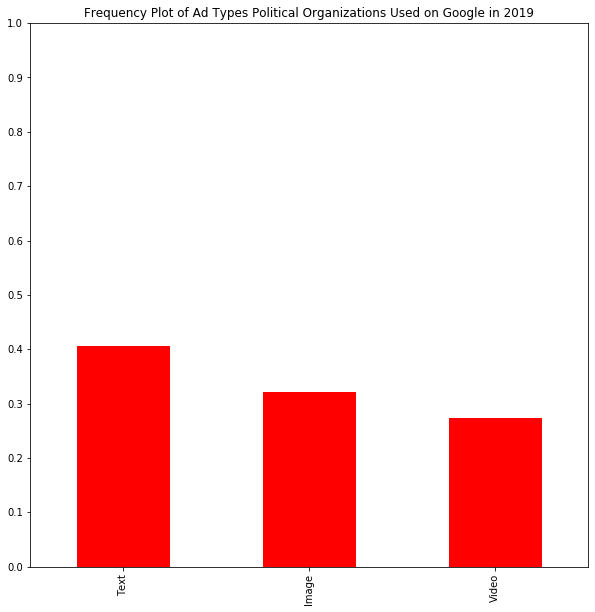

In [134]:
plt.figure(figsize=(10, 10))

df['ad_type'].value_counts(sort = True, normalize = True).plot(kind='bar', color = 'red')

plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title("Frequency Plot of Ad Types Political Organizations Used on Google in 2019")
plt.show()

## 1. What campaigns and political organizations in the United States are advertising on Google and its platforms in 2019? Is advertising predominantly from the presidential campaigns or are third party issue groups also heavily using the platform?

The list below shows a sample of the campaigns and interest groups that have purchased ads on Google's sites in 2019 along with the total number of advertisements that they have purchased so far. There are 366 organizations that have purchased ads on Google's sites. The list is not exhaustive, but it reveals there is a mix of different types of political organizations using the platform, including: 2020 presidential campaigns, congressional campaigns, and interest groups. But, we also can see that the two presidential campaigns are purchasing substantially more ads than congressional and interest groups. 

In [135]:
# Counting the number of ads per advertiser

df.groupby('advertiser_name')['advertiser_id'].value_counts()

advertiser_name                           advertiser_id       
314 ACTION                                AR19439915334893568         2
314 ACTION FUND                           AR402262101457895424        3
A WHOLE LOT OF FOLKS FOR WILMOT COLLINS   AR336115481930891264       11
AAMEC INC                                 AR314371265102086144       51
ACCOUNTABLE NEW YORK, INC.                AR416022764357419008        3
ACT ON CLIMATE NOW                        AR298977552557408256       90
AL GROSS EXPLORATORY COMMITTEE            AR160549313498316800        7
ALASKANS FOR DAN SULLIVAN                 AR99443405028851712         2
ALEXANDER R SHASHLO                       AR300969042993217536        2
ALEXANDRIA OCASIO-CORTEZ FOR CONGRESS     AR216489716340490240       32
ALICE MADDEN FOR SENATE                   AR166127685741838336        5
ALLEN THOMAS FOR CONGRESS                 AR277716296211103744       68
ALLIANCE FOR A BETTER MINNESOTA           AR403269528986845184        2
A

In the graph below, I show the top ten advertisers, ranked in terms of the number of ads that they have purchased, to get a better sense of whether presidential campaigns are using the platform more than other organizations or not.

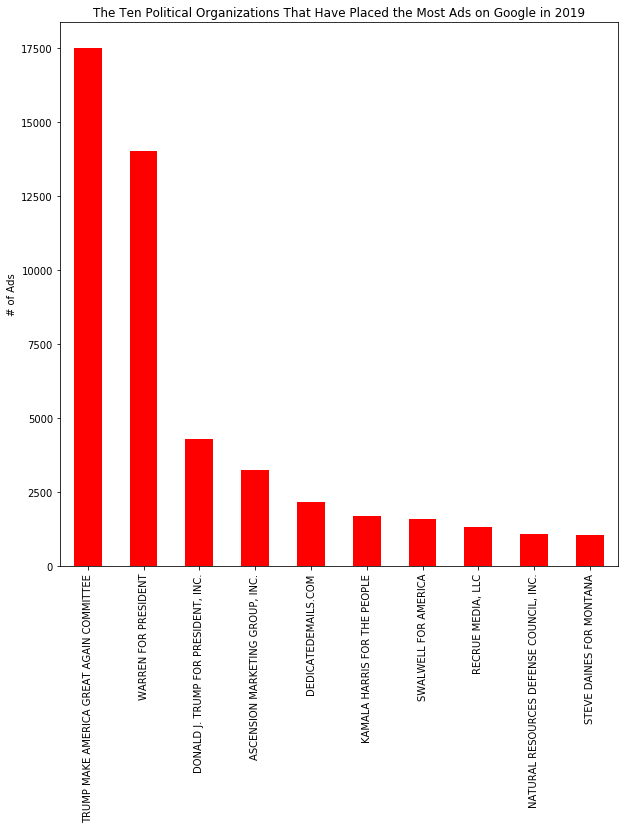

In [136]:
# Creating a frequency bar graph plotting the number of ads placed by the ten political organizations that have 
# purchased the most ads in 2019 (thus far).
plt.figure(figsize=(10, 10))

df.groupby('advertiser_name')['ad_id'].count().nlargest(10).plot(kind = 'bar', color = 'red')
plt.title("The Ten Political Organizations That Have Placed the Most Ads on Google in 2019")
plt.xlabel("")
plt.ylabel("# of Ads")

plt.show()


Five of the top ten organizations that have purchased the most ads on Google's platforms are presidential campaigns, one is a U.S. Senate campaign (Steve Daines for Montana), but the identities of three of the remaining four are not immediately clear. The fourth, the Natural Resources Defense Council, Inc., is a national advocacy group dedicated to environmental causes. The three obscurely-named groups could be related to the major political parties, but they could also be affiliated with major interest groups. Google does not provide background or contextual information about individual advertisers in their database. But, it does allow users to view each organization's ads, which provide enough clues to identify the organization behind the obscure title listed in the database. 

The mystery organizations are affiliated with conservative interest groups dedicated to advancing conservative causes. Ascension Marketing Group, Inc. is placing ads for Liberty Headlines, a conservative political group. Dedicatedemails.com is associated with a group that places independent ads supporting President Trump. But, their ads do not provide enough clues to identify the name of the advocacy group that they affiliate with. Recrue Media, LLC, is affiliated with American Action Network, a conservative issue advocacy group. 

If we expand our scope to the top twenty organizations, as we do in the graph below, two interesting patterns come to light. One, usage continues to decline quickly and that there is a greater mix of organizations that use Google's platforms. The 11th-20th heaviest users include three additonal presidential campaigns (Andrew Yang, Tulsi Gabbard, and Tom Steyer), the Republican and Democratic National Committees, and a mix of gubernatorial campaigns, congressional campaigns, and issue advocacy organizations (Need to Impeach and The Committee to Defend the President). Need to Impeach is Tom Steyer's organization dedicated to promoting impeaching President Trump and The Committee to Defend the President works to promote the president's agenda.


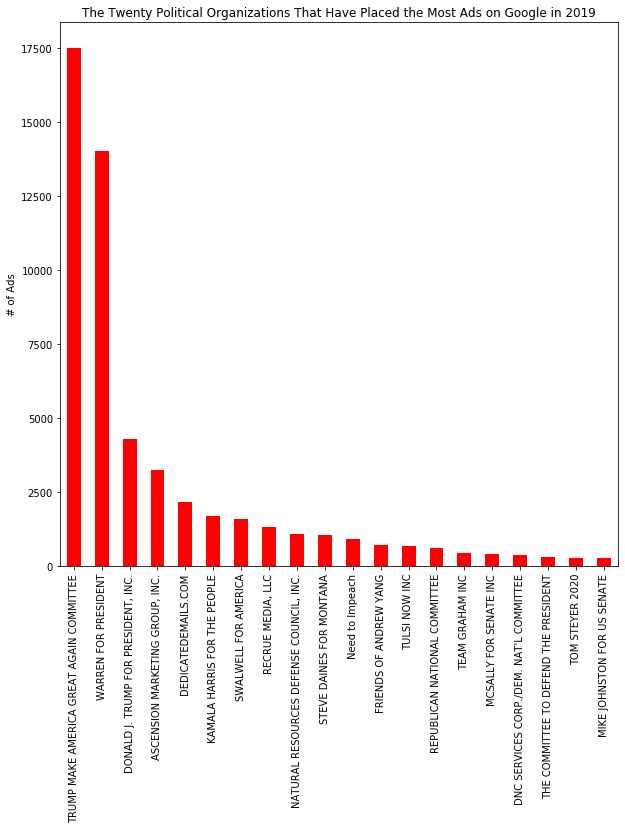

In [137]:
# Creating a frequency bar graph plotting the number of ads placed by the ten political organizations that have 
# purchased the most ads in 2019 (thus far).

plt.figure(figsize=(10, 10))

df.groupby('advertiser_name')['ad_id'].count().nlargest(20).plot(kind = 'bar', color = 'red')
plt.title("The Twenty Political Organizations That Have Placed the Most Ads on Google in 2019")
plt.xlabel("")
plt.ylabel("# of Ads")

plt.show()

## 2. Is there a lot of variation between organizations in how much they are spending on ads and is there a lot of variation with respect to their reach in the electorate?

### Ad Spending

The figure below displays the ten organizations that have spent the most on Google advertising in 2019 and shows a different outcome than the two last figures. Seven of them are presidential campaigns and three are issue advocacy groups. Comparing this graph to the previous one, we see that, unsurprisingly, presidential campaigns are making a greater number of large scale purchases than other groups. Also, several campaigns are on this list that were not on the previous ones: Amy For America (Amy Klobuchar), Beto for America (Beto O'Rourke), and Tom Steyer 2020 (Tom Steyer). 

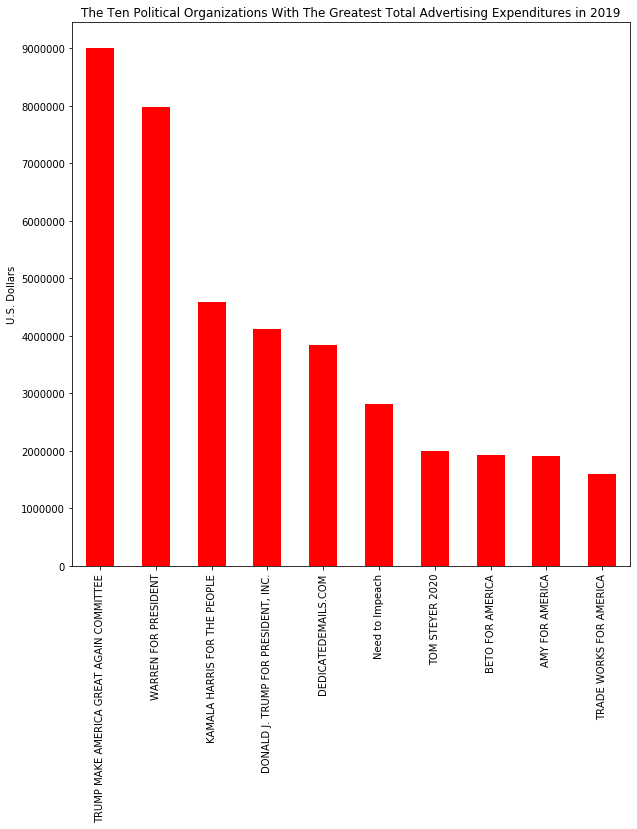

In [138]:
plt.figure(figsize=(10, 10))

df.groupby('advertiser_name')['spend_midpoint_usd'].sum().nlargest(10).plot(kind = 'bar', color = 'red')

plt.title("The Ten Political Organizations With The Greatest Total Advertising Expenditures in 2019")
plt.xlabel("")
plt.ylabel("U.S. Dollars")
plt.yticks(np.arange(0, 10000000, step=1000000))
                     
plt.show()

Figures A and B below graph the ten organizations with the highest mean and median expenditures per ad in 2019. Almost all of the organizations displayed in the graphs show have an average and a median expenditure of $25,000. We also do not observe any of the presidential campaigns or other issue groups that were in the previous two graphs showing the ten organizations that purchsed the most ads in 2019 and the ten organizations that spent the most. This suggests that most organizations tend to make five figure ad purchases, but that presidential campaigns and other national groups are among the groups that have made the largest purchases. 

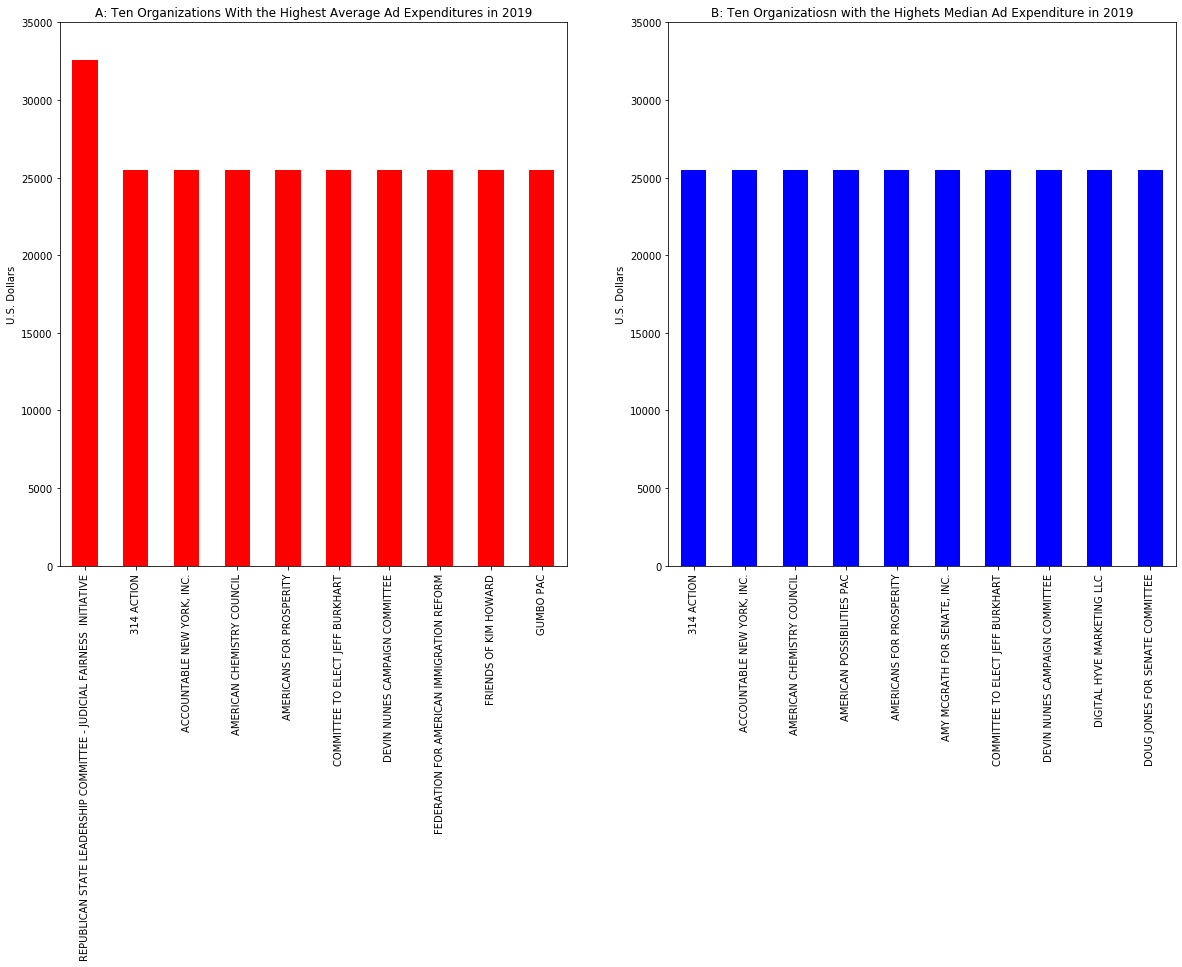

In [139]:
# Creating a subplot with mean and median expenditures subplot.
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
df.groupby('advertiser_name')['spend_midpoint_usd'].mean().nlargest(10).plot(kind = 'bar', color = 'red')
plt.title("A: Ten Organizations With the Highest Average Ad Expenditures in 2019")
plt.xlabel("")
plt.ylabel("U.S. Dollars")
plt.yticks(np.arange(0, 40000, step=5000))

plt.subplot(1, 2, 2)
df.groupby('advertiser_name')['spend_midpoint_usd'].median().nlargest(10).plot(kind = 'bar', color = 'blue')
plt.title("B: Ten Organizatiosn with the Highest Median Ad Expenditure in 2019")
plt.xlabel("")
plt.ylabel("U.S. Dollars")
plt.yticks(np.arange(0, 40000, step=5000))

plt.show()

If we look at each organization's maximum purchase and rank organizations by this metric, we see that presidential campaigns tend the make the largest single ad buys. Seven of the ten organizations in this figure are presidential campaigns, including Bennett for America (Michael Bennett), Biden for President, Inslee for America, and Bernie 2020. Those organizations were not displayed in previous figures. The remaining three are Amy McGrath for Senate (Kentucky 2020), Judicial Watch Inc (conservative advocacy group focused on federal judiciary appointments), and the Ditch Fund, an organization opposing Senate Majority Leader Mitch McConnell's re-election effort. 

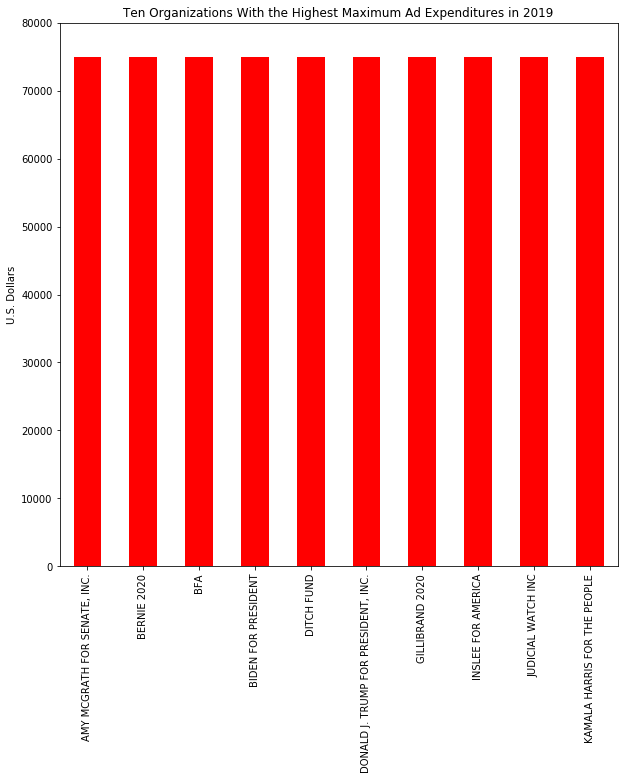

In [140]:
plt.figure(figsize=(10, 10))

df.groupby('advertiser_name')['spend_midpoint_usd'].max().nlargest(10).plot(kind = 'bar', color = 'red')

plt.title("Ten Organizations With the Highest Maximum Ad Expenditures in 2019")
plt.xlabel("")
plt.ylabel("U.S. Dollars")
plt.yticks(np.arange(0, 90000, step=10000))

plt.show()

### Ad Exposure

To get a sense of how political organizations vary with respect to their ad exposure, we will look at the distributions of ads impressions for each of the top ten heaviest Google Ads users. This will give us look into how many people see their ads and give us a sense of how this varies across political organizations. Before we proceed, let us review the list of the ten political organizations with the most ads. 

In [141]:
# To begin to get a sense of variation in impressions across organizations
#I am going to compare the impressions per ad between the ten political advertises that have placed the most ads

df.groupby('advertiser_name')['ad_id'].count().nlargest(10)

advertiser_name
TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE    17492
WARREN FOR PRESIDENT                        14013
DONALD J. TRUMP FOR PRESIDENT, INC.          4280
ASCENSION MARKETING GROUP, INC.              3235
DEDICATEDEMAILS.COM                          2170
KAMALA HARRIS FOR THE PEOPLE                 1699
SWALWELL FOR AMERICA                         1579
RECRUE MEDIA, LLC                            1301
NATURAL RESOURCES DEFENSE COUNCIL, INC.      1089
STEVE DAINES FOR MONTANA                     1046
Name: ad_id, dtype: int64

### Ad Exposure

The figure below shows the distribution of ads by the quantity of impressions that their ads achieve for the ten political organizations that have placed the most ads on Google's platforms in 2019. Ad impressions measure the number of times that users have seen it. The figures appear left to right in order of ranking from the organization that placed the most ads (Trump Make America Great Again Committee) to the organizaton that has placed the tenth most (Steve Daines for Montana). 

For nine out of the ten organizations, they are mostly running ads that have 10,000 or fewer impressions. With the exception of Recrue Media, LLC., a majority of every organization's ads garnered fewer than 10,000. Recrue Media, the exception, has almost as many ads that garner 10,000 to 100,000 impressions as they do those that garner fewer than 10,000. 

This pattern supports my speculation that the organizations are employing a sophisticated strategy targeting smaller audiences. If this is true, each organization's ad campaign (identified by ad_campaign_list) carries a specfic message tailored to its intended audience. A future stage of this project may explore this in greater detail.  

In [142]:
# I am creating another version of the impressions variable with integer values for each category because 
# running value_counts sorts the values in descending order, which does not work for one of the plots
# in the subplot below.

def func(x):
    if x == '< 10K' :
        return 1
    elif x == '10k-100k' :
        return 2
    elif x == '100k-1M' :
        return 3
    elif x == '1M-10M' :
        return 4
    elif x == '> 10M' :
        return 5
    else:
        return 'NAN'

df['impressions_cat'] = df['impressions'].apply(func)

In [143]:
df.impressions_cat.values

array([1, 1, 2, ..., 2, 1, 1])

In [144]:
top_ten_imp = df.groupby('advertiser_name')['impressions_cat'].value_counts(normalize = True, sort = False)

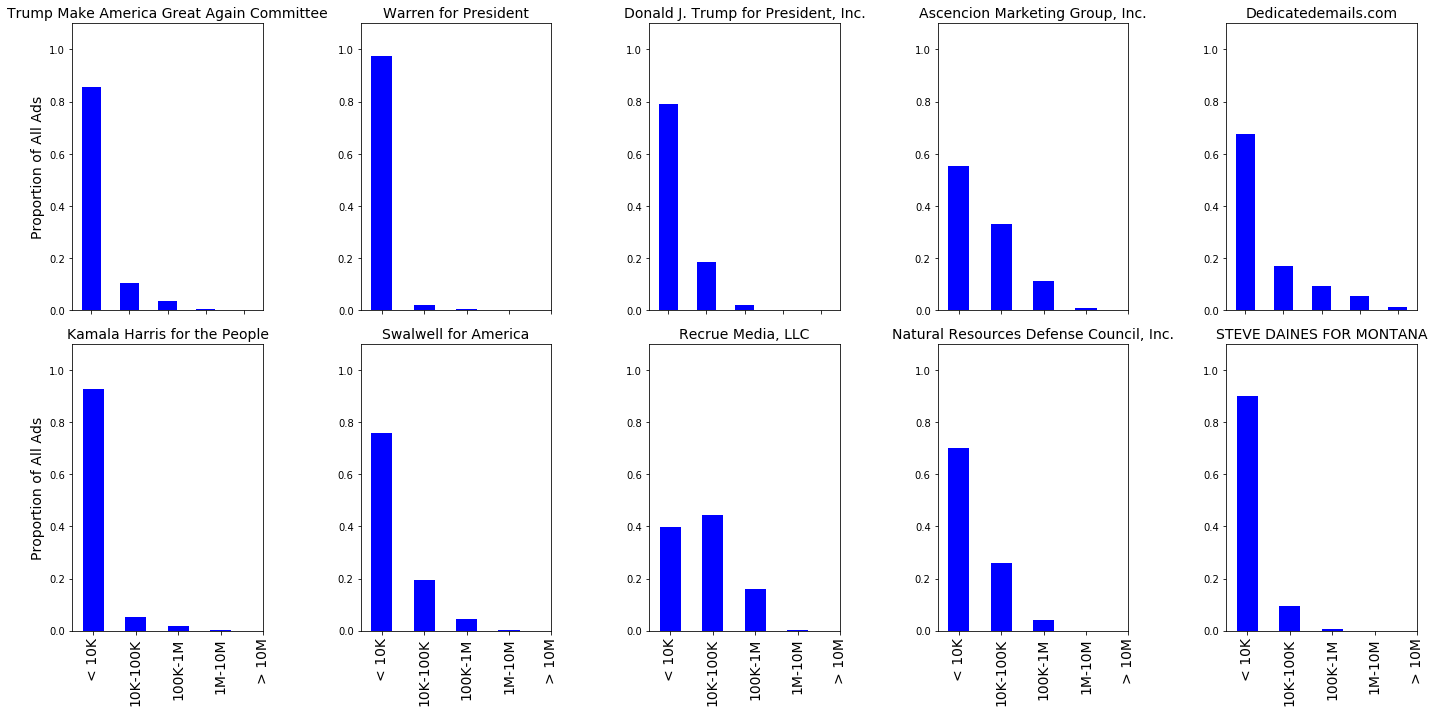

In [149]:
# Making a subplot of the distributions of impressions for each of the top ten political campaigns 
# in terms of ad usage

plt.figure(figsize=(20, 10))


plt.subplot(2, 5, 1)
top_ten_imp['TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE'].plot(kind='bar', color = 'blue')
plt.ylabel('Proportion of All Ads', fontsize = 14) #labeling the y-axis
plt.xlabel("")
plt.xticks(np.arange(5), ('', '', '', '', ''))
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.title("Trump Make America Great Again Committee", fontsize = 14)

plt.subplot(2, 5, 2)
top_ten_imp['WARREN FOR PRESIDENT'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks(np.arange(5), ('', '', '', '', ''))
plt.title("Warren for President", fontsize = 14)

plt.subplot(2, 5, 3)
top_ten_imp['DONALD J. TRUMP FOR PRESIDENT, INC.'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks(np.arange(5), ('', '', '', '', ''))
plt.title("Donald J. Trump for President, Inc.", fontsize = 14)

plt.subplot(2, 5, 4)
top_ten_imp['ASCENSION MARKETING GROUP, INC.'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks(np.arange(5), ('', '', '', '', ''))
plt.title("Ascencion Marketing Group, Inc.", fontsize = 14)

plt.subplot(2, 5, 5)
top_ten_imp['DEDICATEDEMAILS.COM'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks(np.arange(5), ('', '', '', '', ''))
plt.title("Dedicatedemails.com", fontsize = 14)

plt.subplot(2, 5, 6)
top_ten_imp['KAMALA HARRIS FOR THE PEOPLE'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks((0, 1, 2, 3, 4), ('< 10K', '10K-100K', '100K-1M', '1M-10M', '> 10M'), fontsize = 14)
plt.ylabel('Proportion of All Ads', fontsize = 14) #labeling the y-axis
plt.title("Kamala Harris for the People", fontsize = 14)

plt.subplot(2, 5, 7)
top_ten_imp['SWALWELL FOR AMERICA'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks((0, 1, 2, 3, 4), ('< 10K', '10K-100K', '100K-1M', '1M-10M', '> 10M'), fontsize = 14)
plt.title("Swalwell for America", fontsize = 14)

plt.subplot(2, 5, 8)
top_ten_imp['RECRUE MEDIA, LLC'].plot(kind='bar', color = 'blue', use_index = True)
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks((0, 1, 2, 3, 4), ('< 10K', '10K-100K', '100K-1M', '1M-10M', '> 10M'), fontsize = 14)
plt.title("Recrue Media, LLC", fontsize = 14)

plt.subplot(2, 5, 9)
top_ten_imp['NATURAL RESOURCES DEFENSE COUNCIL, INC.'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks((0, 1, 2, 3, 4), ('< 10K', '10K-100K', '100K-1M', '1M-10M', '> 10M'), fontsize = 14)
plt.title('Natural Resources Defense Council, Inc.', fontsize = 14)
          
plt.subplot(2, 5, 10)
top_ten_imp['STEVE DAINES FOR MONTANA'].plot(kind='bar', color = 'blue')
plt.ylim(0, 1.1) #Setting the range for the y-axis
plt.xlabel("")
plt.xticks((0, 1, 2, 3, 4), ('< 10K', '10K-100K', '100K-1M', '1M-10M', '> 10M'), fontsize = 14)
plt.title('STEVE DAINES FOR MONTANA', fontsize = 14)

plt.tight_layout()
plt.show()

## 3. Which types of ads are organizations airing the most (text, video, or images)?

As we previously observed, political organizations use text ads more than image or video ads, respectively (see graph below). Do organizations spend less on text ads than the others types?

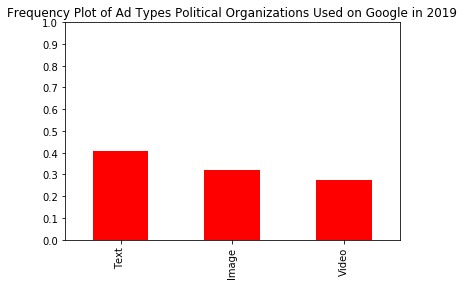

In [150]:
#Replotting the frequency distribution for ad-Type

df['ad_type'].value_counts(sort = True, normalize = True).plot(kind='bar', color = 'red')

plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title("Frequency Plot of Ad Types Political Organizations Used on Google in 2019")
plt.show()

The table below displays summary statistics of expenditures per ad grouped by the type of ad. Organizations tend to spend about the same per ad across each of the ad types. The median spending per ad for image, text, and video are each fifty dollars. The dataset is positively skewed though, and the means vary across the types. The average cost for a text ad is $1410, while the average cost for a video ad is $1168, and the average image-based ad is $840. 

This is aggregated across the whole set of organizations in the database. If we look at these statsitics among the national organizations that place the most ads, will we see different a diferent outcome? Do national orgnaizations with greater amounts of resources than most of the other organizations in the database allocate their spending differently? This would be interesting to pursue in further research.

In [151]:
# Grouping ad spending by type to observe summary statistics on this grouping. 

df.groupby('ad_type')['spend_midpoint_usd'].describe()



count         mean          std   min   25%   50%   75%      max
ad_type                                                                    
Image    19593.0   840.011739  4335.950152  50.0  50.0  50.0  50.0  75000.0
Text     24765.0  1410.642035  5843.861228  50.0  50.0  50.0  50.0  75000.0
Video    16668.0  1168.625510  5213.941303  50.0  50.0  50.0  50.0  75000.0

## Research Proposal

This exploratory analysis raised a number of questions about how political organizations use digital advertising platforms that are worth pursuing further. One of the limitations of this dataset is that it only provided broad rangss for spending and for the number of impressions that each ad achieved. Another limitation that kept this analysis from going further is that these data did not provide precise geographical information for where each was run. The database has over 360 organizations and they range from major national organizations with vast resources to congressional campaigns to smaller issue advocacy groups. It is likely that each organization targeted a specific media market, congressional district, or municipality and it would be interesting to observe the geographical placment of ads across different organizations. That, combined with more precise measures of spending and impressions per ad, may uncover additional clues about what additional exploratory analysis is merited. 

I propose to extend this project to analyze how the dynamics in political organizations' media strategies affect political and civic participation online. More specifically, I want to learn how political organizations' media campaigns affect digital political and social behavior and whether it leads people behave in ways that conventional wisdom would not anticipate. I propose to answer the following questiosn as this project goes forward: 
- What type of digital ads stimulate users to get politically involved online? What types of behavior do users exhibit in response to different types of ads?
- How do political ads affect peoples' attitudes not only towards campaigns, but also about issues and policies? Can we measure how ads seen in Google sarch results or on YouTube affect issue and policy attitudes using natural language processing? For example, one possible focus is to measure how digital advertising affects public opinion about state and local issues that go largley ignored in public opinion surveys by reputable pollsters. This likely can be monetized since public opinion on local issues is an untapped market.
- Do political ads influence what products people buy online? For example, do ads about crime push people to purchase alarm systems and related products for their homes? If ads make us anxious, do we search for things online that we do not search for in response to ads that make us happy?

For my next steps on this project, I first want to incorporate additional aggregate-level ads data from Google's transparency report database to get more leverage on how organizations are using the platform. Google also provides data on weekly ad purchases that would allow an investigator to analyze how political organizations are changing their ads strategies over time. It also has more granular data on geographical placement, but the files require munging and cleaning and were more time intensive than time constraints for this iniital project allowed. Most importantly, I intend to merge behavioral data such as google searches and tweets into this dataframe. Google Searches can provide insights about political involvement as well as whether people are searching for particular products after seeing ads. Tweets can provide valuable information about public opinion since they are open-ended comments that are not limited by the structure of survey questions. 


